[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/arunsinp/Python-programming/blob/main/Python-fundamental/zerotopandas_course_project.ipynb/HEAD)

<a href="https://colab.research.google.com/github/arunsinp/Python-programming/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>


# Indian Election Dataset

State and National Level Election Data from 1977 - 2015

## About this dataset

This database contains detailed candidate‐level data for elections to the lower houses of India’s national
and state legislatures, i.e., the Lok Sabha and Vidhan Sabhas. The data span 1977‐2015, with each row
representing a candidate that ran for office in that state‐year.

**The variables in the national election data file are:**

| Variable name |   Storage    |  type Variable contents |
|---------------|--------------|-------------------------|
| st_name  |     str35 |     State |
| Year |     Int |    General election year| 
| pc_no |     Byte |     Parliamentary constituency number |
| pc_name |     str25 |     Parliamentary constituency name |
| pc_type |     str3 |    Parliamentary constituency reservation status |
| cand_name |     str70 |     Candidate name |
| cand_sex |     str1 |     Candidate sex | 
| partyname |     str57 |     Party name | 
| partyabbre |     str10 |     Party abbreviation |
| totvotpoll |     Long |     Votes received |
| electors  |     Long |     Number of registered voters |

**The variables in the state election data file are:**

| Variable name |   Storage    |  type Variable contents |
|---------------|--------------|-------------------------|
| st_name |     sstr35 |     State |
| Year |     float |     Assembly election year |
| ac_no |     int |     Assembly constituency number|
| ac_name |     str28 |     Assembly constituency name |
| ac_type |     str5 |     Assembly constituency reservation status |
| cand_name |     str98 |     Candidate name |
| cand_sex |     str1 |     Candidate sex | 
| partyname |     str60 |     Party name| 
| partyabbre |     str11 |     Party abbreviation | 
| totvotpoll |     long |     Votes received |
| electors |     long |     Number of registered voters |


**Notes:**
1. There were two state elections in Bihar in 2005. In order to distinguish data for the two elections from one another, data for the second have the year 2005.
2. Data for bye‐elections are not included. Data were sourced from the Election Commission of India’s online reports, and from field visits.

**Acknowledgements** 
- Bhavnani, Rikhil R., 2017, "[India National and State Election Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/26526)", Harvard Dataverse Network V2.

## Purpose of the present data analysis

These data can be used to calculate a number of fields, including turnout, vote shares, winning status, effective number of parties and so forth. The present analysis is a part of **Course Project - Exploratory Data Analysis** for the course [Data Analysis with Python: Zero to Pandas](https://jovian.com/learn/data-analysis-with-python-zero-to-pandas). Here we will try to use all the libraries and relevant functions learnt in the course.

## How to run the code

We can run this code in two ways:
1. Google colab
2. Binder

To compile at google colab or binder, just click the link given at the top of this notebook.

# Steps to follow:

- **Step-1:** Selecting a real-world dataset
- **Step-2:** Performing data preparation & cleaning
- **Step-3:** Performing exploratory analysis & visualization
- **Step-4:** Asking & answering questions about the data
- **Step-5:** Summarizing the inferences & writing my conclusions
- **Step-6:** submission & share of the work
- **Step-7:** My link on Medium for the present work

## **Step-1:** Selecting a real-world dataset

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
%pip install jovian opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/awadhi123/indian-election-dataset'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./indian-election-dataset" (use force=True to force download)


Now we have downloaded the two datasets and has been extracted in `indian-election-dataset` folder:
- `indian-national-level-election.csv`
- `indian-state-level-election.csv`

In [4]:
# Change this
data_dir = './indian-election-dataset'

In [5]:
%pwd

'/Users/arunp77/Documents/Data-science/Python/Python-programming/Python-fundamental'

In [6]:
# Now listing the downloaded files 
import os
os.listdir(data_dir)

['indian-national-level-election.csv', 'indian-state-level-election.csv']

In [7]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [8]:
%pip install jovian --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [9]:
import jovian

<IPython.core.display.Javascript object>

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## **Step-2:** Performing data preparation & cleaning

**TODO** - I have divided this section in following steps:

- Substep-1: Import necessary libraries, like numpy, pandas, matplotlib and seaborn
- Substep-2: Then load dataset into a dataframe using pandas. Here I will load two dataset
  - 1976-2020-national-level
  - 1976-2020-state-level
- Substep-3: Data Understanding of the two datasets. For example, 
  - shape, 
  - dtype, 
  - columns 
  
  in the two dataset. 
  
- Substep-4: Data Preparation, such as 
  - Dropping irrelaevant columns and rows
  - Identify duplicated columns
  - renaming Columns
  - Handle missing, incorrect and invalid data
  - Feature creation
- Substep-5: Next joining the two datasets, finding and relations etc.

Before loading the daatafiles, we need to import important libraries, used for the data analysis


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

Lets load the first and second datasets

In [15]:
# Imorting files
national_df = pd.read_csv('./indian-election-dataset/indian-national-level-election.csv')

Data Understanding of the dataset. For example, 
  - shape, 
  - dtype, 
  - columns 

In [16]:
national_df.shape

(73081, 11)

In [17]:
national_df.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

Here, we found that the year is int64 type. So wee need to change it to datetime type.

In [18]:
# converting the date into datetime
national_df['year'] = pd.to_datetime(national_df['year'], format='%Y')

In [19]:
# Now again checking the datatype
national_df.dtypes

st_name               object
year          datetime64[ns]
pc_no                  int64
pc_name               object
pc_type               object
cand_name             object
cand_sex              object
partyname             object
partyabbre            object
totvotpoll             int64
electors               int64
dtype: object

In [24]:
# Now checking the columns of the dataset.
national_df.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [26]:
# writing above column names as dataframe format.
col_df = pd.DataFrame(national_df.columns, columns=['Column names'])
col_df

,Column names
0,st_name
1,year
2,pc_no
3,pc_name
4,pc_type
5,cand_name
6,cand_sex
7,partyname
8,partyabbre
9,totvotpoll


In [29]:
# now checking some common statistics
national_df.describe()

,pc_no,totvotpoll,electors
count,73081.000000,73081.000000,7.308100e+04
mean,22.311490,49834.760266,1.122277e+06
std,19.039793,104893.319706,3.560049e+05
min,1.000000,0.000000,1.947100e+04
25%,7.000000,872.000000,9.129850e+05
50%,18.000000,2743.000000,1.099503e+06
75%,33.000000,19185.000000,1.329086e+06
max,85.000000,863358.000000,3.368399e+06


In [28]:
# Now checkinf the dataset
national_df

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977-01-01,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977-01-01,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980-01-01,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980-01-01,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980-01-01,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084
...,...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014-01-01,42,Birbhum,GEN,None Of The Above,NaN,NOTA,NOTA,14557,1495089
73077,West Bengal,2014-01-01,42,Birbhum,GEN,Syed Siraj Jimmi,M,INC,INC,132084,1495089
73078,West Bengal,2014-01-01,42,Birbhum,GEN,Joy Banerjee,M,BJP,BJP,235753,1495089
73079,West Bengal,2014-01-01,42,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,CPM,393305,1495089


So we have total 73081 rows and 11 columnns. we now need to do data preparation for the analysis. Forr exammple:
  - Dropping irrelaevant columns and rows
  - Identify duplicated columns
  - renaming Columns
  - Handle missing, incorrect and invalid data
  - Feature creation

In [30]:
# We have seen that there are many columns and we many not necessarily need all columns
national_dfcopy = national_df[['st_name', 'year', 
      # 'pc_no', 
      'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 
       # 'partyname', 
       'partyabbre', 'totvotpoll', 'electors'
    ]].copy()

In [31]:
national_dfcopy.columns

Index(['st_name', 'year', 'pc_name', 'pc_type', 'cand_name', 'cand_sex',
       'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [32]:
# We can see that some of the column are needed to be changed. To do this
national_dfcopy = national_dfcopy.rename(columns={'st_name': 'State', 
                                                  'year': 'Year', 
                                                  'cand_name': 'Candidate', 
                                                  'partyabbre': 'Party'
                                                  })

In [33]:
# Checking top 5 rows of the dataset
national_dfcopy.head()

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors
0,Andaman & Nicobar Islands,1977-01-01,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,IND,25168,85308
1,Andaman & Nicobar Islands,1977-01-01,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,INC,35400,85308
2,Andaman & Nicobar Islands,1980-01-01,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,IND,109,96084
3,Andaman & Nicobar Islands,1980-01-01,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,IND,125,96084
4,Andaman & Nicobar Islands,1980-01-01,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,IND,405,96084


Now we need to find all cells with `NAN`. 

**NaN values:**

- Now to to change the value of a cell with `NaN` to "other", we can use the following code: `df.at[row_label, col_label] = "other"`
- If we want to change all cells with `NaN` values in a particular column to "other", you we use the following code: `df[col_label].fillna("other", inplace=True)`. The `fillna` method fills all `NaN` values in the column with the specified value (in this case, "other"). The `inplace=True` argument specifies that the change should be made in-place, i.e., directly in the original DataFrame, instead of returning a new DataFrame.
- If we want to change all cells with `NaN` values in the entire DataFrame to "other", we can use the following code: `df.fillna("other", inplace=True)`

In [34]:
national_dfcopy.isna().sum()

State            0
Year             0
pc_name          0
pc_type       8070
Candidate        0
cand_sex       542
Party            0
totvotpoll       0
electors         0
dtype: int64

In [35]:
# to find the index of NAN in the dataframe
nan_national_dfcopy_indices = national_dfcopy[national_dfcopy.isna().any(axis=1)].index
nan_national_dfcopy_indices

Int64Index([   64,    65,    66,    67,    68,    69,    70,    71,    72,
               73,
            ...
            72973, 72984, 72997, 73013, 73022, 73032, 73041, 73055, 73064,
            73076],
           dtype='int64', length=8612)

In [36]:
# to find the index of NAN in the dataframe
# loc_president_indices = 
national_dfcopy.loc[national_dfcopy.isna().any(axis=1)]
#print(loc_president_indices)

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors
64,Andaman & Nicobar Islands,2009-01-01,Andaman & Nicobar Islands,NaN,Shri. T. Ali,M,IND,398,265110
65,Andaman & Nicobar Islands,2009-01-01,Andaman & Nicobar Islands,NaN,Dr. Thankachan,M,IND,683,265110
66,Andaman & Nicobar Islands,2009-01-01,Andaman & Nicobar Islands,NaN,Shri. N. K. P. Nair,M,CPI(ML),734,265110
67,Andaman & Nicobar Islands,2009-01-01,Andaman & Nicobar Islands,NaN,Shri. M. S. Mohan,M,BSP,789,265110
68,Andaman & Nicobar Islands,2009-01-01,Andaman & Nicobar Islands,NaN,Shri. Vakiath Valappil Khalid,M,IND,1480,265110
...,...,...,...,...,...,...,...,...,...
73032,West Bengal,2014-01-01,Bardhaman Purba,SC,None Of The Above,NaN,NOTA,13951,1532244
73041,West Bengal,2014-01-01,Burdwan - Durgapur,GEN,None Of The Above,NaN,NOTA,16886,1583495
73055,West Bengal,2014-01-01,Asansol,GEN,None Of The Above,NaN,NOTA,11479,1469684
73064,West Bengal,2014-01-01,Bolpur,SC,None Of The Above,NaN,NOTA,17322,1538421


So we can see that there are various places where NaN arises. So we need to either remove it (if it is not relevant) or change it to something, which may represent it well.

In [63]:
# unique 'pc_type' are
national_dfcopy['pc_type'].unique()

array(['GEN', nan, 'ST', 'SC', 'SC '], dtype=object)

We see that there is one nan pc_type. Here we can say that wherever nan is written in this column, the 'parliamentary constituency reservation status' is open. It is not reserved for any particular caste. So we will replace it with Unreserved.

In [64]:
national_dfcopy["pc_type"].fillna("Unreserved", inplace=True)

In [65]:
national_dfcopy['pc_type'].unique()

array(['GEN', 'Unreserved', 'ST', 'SC', 'SC '], dtype=object)

In [96]:
national_dfcopy['cand_sex'].unique()

array(['M', 'F', 'Open', 'O'], dtype=object)

In [98]:
# Total number of elections from 1977 - 2015
national_dfcopy['Year'].nunique()

11

In [99]:
# Unique years when elections happen during 1977 - 2015
national_dfcopy['Year'].unique()

array(['1977-01-01T00:00:00.000000000', '1980-01-01T00:00:00.000000000',
       '1984-01-01T00:00:00.000000000', '1989-01-01T00:00:00.000000000',
       '1991-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [68]:
national_dfcopy['cand_sex'].isna().sum()

542

So we have 4 options for the reservation for the candidate sex for a particular consituncy. 
- M: Male
- F: Female
- O: Others
- nan: Here we can say that these consituencies are not reserved for particular sex category.

So we can change it to 'Open' for all kind of gender.

In [69]:
national_dfcopy["cand_sex"].fillna("Open", inplace=True)

In [70]:
national_dfcopy['cand_sex'].isna().sum()

0

Now let's check, if there are other columns with NAN values.

In [71]:
national_dfcopy.isna().sum()

State         0
Year          0
pc_name       0
pc_type       0
Candidate     0
cand_sex      0
Party         0
totvotpoll    0
electors      0
dtype: int64

So we have no NAN in any columns.

In [75]:
national_dfcopy.columns

Index(['State', 'Year', 'pc_name', 'pc_type', 'Candidate', 'cand_sex', 'Party',
       'totvotpoll', 'electors'],
      dtype='object')

In [ ]:
import jovian

In [ ]:
jovian.commit()

## **Step-3:** Performing exploratory analysis & visualization

**TODO** - Here, we ask oursself few questions aand solve it. 
First start with 
- Computing mean, sum, rannge aand other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

Now let's first import few important python libraries for the exploratory analysis and visualization.

In [76]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [78]:
national_dfcopy.columns

Index(['State', 'Year', 'pc_name', 'pc_type', 'Candidate', 'cand_sex', 'Party',
       'totvotpoll', 'electors'],
      dtype='object')

**TODO -** Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0, 0.5, 'Counts')

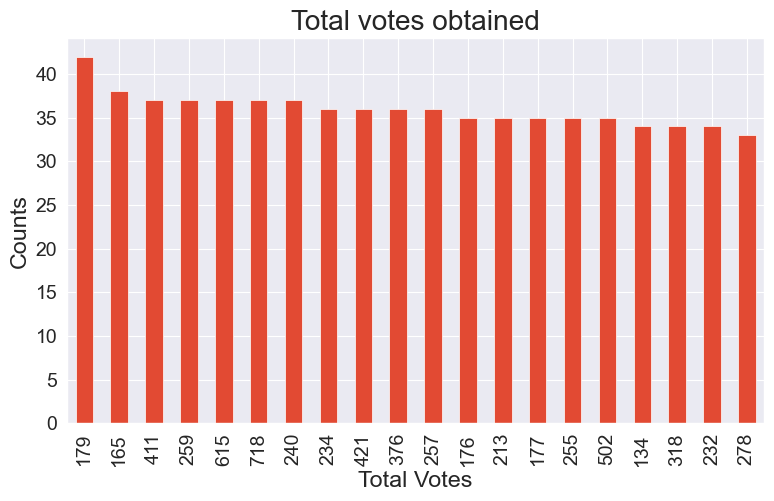

In [83]:
# so to see the year wise number of roller coster introduced
ax = national_dfcopy['totvotpoll'].value_counts()\
    .head(20)\
    .plot(kind='bar', title = 'Total votes obtained')

ax.set_xlabel('Total Votes')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

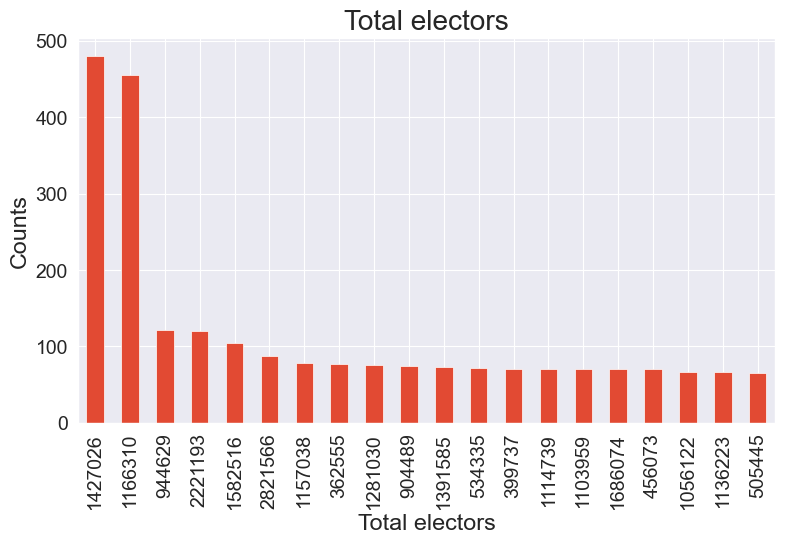

In [87]:
# so to see the year wise number of roller coster introduced
ax = national_dfcopy['electors'].value_counts()\
    .head(20)\
    .plot(kind='bar', title = 'Total electors')

ax.set_xlabel('Total electors')
ax.set_ylabel('Counts')

So what we see here is that, we can not say what does this plot actually plot. What we can do is 
1. How many times or years a particular candidate fight elections.
2. How much votes a candiate obtained in his life time?
3. Party vs totvotpoll in lifetime
4. 
5. 
6. 
7. 
8. 
9. 
10. 


Year: 1976-2020 

Each election party performance
Each election a candidate performance
Leading party in a election
top performer in the election and constituency name. 
Parties performance sex wise, I mean in which party, womens/men/others have performed well.
Largest constituency with respect to electors + yearwise changes.
Which party 
Out of electors which party has gained largest votes? 








'Year'  'State',  'pc_name', 'pc_type', 'Candidate', 'cand_sex', 'Party',  'totvotpoll', 'electors'

In [97]:
# Total number of elections from 1977 - 2015
national_dfcopy['Year'].nunique()

11

In [ ]:
# Create a figure and an axis object
fig, ax = plt.subplots()

#

In [ ]:
# Create a figure and an axis object
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(x, y1, width=0.4, align='center', label='Column 1')
ax.bar(x, y2, width=0.4, align='edge', label='Column 2')

# Customize the plot
ax.set_ylabel('Values')
ax.set_title('Comparison of Two Columns')
ax.legend()

# Display the plot
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add 

---

some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

## **Step-4:** Asking & answering questions about the data

## **Step-5:** Summarizing the inferences & writing my conclusions

TODO - write some explanation here.

Important questions that can be asked are:
1. Calculate total votes for each candidate in each state
2. Add total state-level votes to this year dataframe
3. 

> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

## Step-6: Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

## **Step-7:** Submission & share of the work

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## **Step-7:** My link on Medium for the present work

Submission Instructions (delete this cell)

Upload your notebook to your Jovian.ml profile using jovian.commit.
Make a submission here: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag @JovianML
(Optional) Write a blog post

A blog post is a great way to present and showcase your work.
Sign up on Medium.com to write a blog post for your project.
Copy over the explanations from your Jupyter notebook into your blog post, and embed code cells & outputs
Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.